<a href="https://colab.research.google.com/github/pedropvsn/Oncase/blob/main/Oncase_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas que normalmente são utilizadas em ciencia de dados
import statsmodels.api as sm
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_treino = pd.read_csv("/content/drive/My Drive/Colab/Oncase 2a/classification_train.csv",  sep=',', decimal=".")
df_treino.head(5)

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [5]:
df_treino.isnull().sum() #quantidade de nulos por coluna

x1        0
x2        0
target    0
dtype: int64

In [7]:
df_test = pd.read_csv("/content/drive/My Drive/Colab/Oncase 2a/classification_test.csv",  sep=',', decimal=".")
df_test.head(5)

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1


# RANDOM FOREST PARA FEATURES IMPORTANCE

In [8]:

# X matriz com as variaveis 
# Y vetor com as respostas

X_train = df_treino.drop(['target'], axis = 1)
y_train = df_treino.target

X_test = df_test.drop(['target'], axis = 1)
y_test = df_test.target


In [9]:

model = RandomForestClassifier(max_depth = 3)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [10]:
model.feature_importances_.round(4)

array([0.4327, 0.5673])

## Hieraquização das variáveis

In [11]:
importances = pd.Series(data=model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False, inplace=True)

importances

x2    0.567298
x1    0.432702
dtype: float64

Text(0.5, 1.0, 'Importância de cada variável')

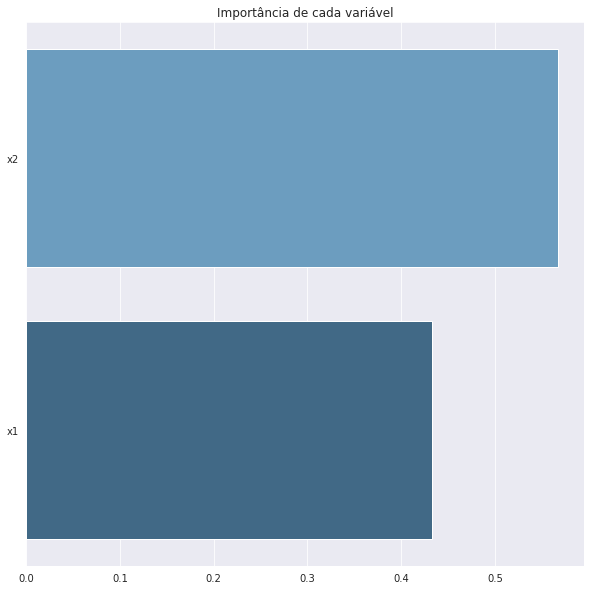

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
#sns.set_style("whitegrid")
ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=importances, y=importances.index, orient='h',palette="Blues_d").set_title('Importância de cada variável')

In [13]:
y_pred_test_2 = model.predict(X_test)

In [14]:
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
#precision, recall e F1-score;

In [15]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test_2))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       169
           1       0.80      0.90      0.85       161

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330

